In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn import metrics
from sklearn.impute import KNNImputer
import statsmodels.api as sm

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

from sklearn.decomposition import PCA

# Part A

#### 1) The space-separated file “auto-mpg.data” contains fuel consumption in mpg with other related data of a set of cars. The original dataset, downloaded from a public domain, has been modified for the purpose of this assignment. Write a Python program to answer the following:

a. Read the data file into a pandas data frame.

In [2]:
#Read the file
df = pd.read_csv('auto-mpg.data',delim_whitespace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
397,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
#Check the datatype
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

b. Identify any duplicate record (s).

In [4]:
#check for duplicate rows
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

Number of duplicate (excluding first) rows in the table is:  2


In [5]:
#Print out the duplicates
df[df.duplicated(keep = False)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
34,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
92,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd
96,16.0,6,225.0,105.0,3439.0,15.5,71,1,plymouth satellite custom
158,13.0,8,351.0,158.0,4363.0,13.0,73,1,ford ltd


c. By keeping one duplicated record delete the other record (s) from the dataset.

In [6]:
#Deleting the duplicated rows
df = df.drop_duplicates()
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
397,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


d. What is the dimension of the data frame after removing the duplicates?

The dimension of the data frame is 398 rows by 9 columns as shown above.

#### 2) Write a Python program to answer the following:

a. How many missing values are in the horsepower column?

In [7]:
#Check missing value in 'hoursepower' column
print('The number of missing values in hoursepower: ', df['horsepower'].isnull().sum())

The number of missing values in hoursepower:  0


In [8]:
#Check all the unique value in 'hoursepower' column
pd.unique(df['horsepower'].ravel())

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [9]:
#Count the number of '?' in 'hoursepower'
df[df['horsepower']=='?'].value_counts()

mpg   cylinders  displacement  horsepower  weight  acceleration  model_year  origin  car_name            
21.0  6          200.0         ?           2875.0  17.0          74          1       ford maverick           1
23.0  4          151.0         ?           3035.0  20.5          82          1       amc concord dl          1
23.6  4          140.0         ?           2905.0  14.3          80          1       ford mustang cobra      1
25.0  4          98.0          ?           2046.0  19.0          71          1       ford pinto              1
34.5  4          100.0         ?           2320.0  15.8          81          2       renault 18i             1
40.9  4          85.0          ?           1835.0  17.3          80          2       renault lecar deluxe    1
dtype: int64

As we can see above, there is irregular value '?' existing in the 'hoursepower' column.

b. Remove the records having the missing values in the horsepower column.

In [10]:
#Back up the dataset for further actions below
df_backup = df.copy()

#Remove the records having the missing/irregular values in the horsepower column
df = df.drop(index = df[df['horsepower'] == '?'].index)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
397,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


c. Take 10% of the available records as a test set and set the horsepower to null for those records.

In [11]:
#Convert the datatype of horsepower into float64
df['horsepower'] = df['horsepower'].astype('float64')

In [12]:
#Take 10% of the available records as a test set 
df_test = pd.DataFrame.sample(df, frac = 0.1, random_state=1)
df_train = df.drop(df_test.index)
print("Testing set range (10%):\t rows 0 to", round(df_test.shape[0]))
print("Training set range (90%):\t rows" , (round(df_test.shape[0])+1), "to", round(df.shape[0]))

Testing set range (10%):	 rows 0 to 39
Training set range (90%):	 rows 40 to 392


d. Fill in the missing values of the test set based on the mean and median of the horsepower of the training set (90%). Calculate the RMSEs for the imputed values of the test set.

In [13]:
#save the copy version of df_test for calculating the RMSE value below
df_test_copy = df_test.copy()
df_test_copy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
82,23.0,4,120.0,97.0,2506.0,14.5,72,3,toyouta corona mark ii (sw)
169,29.0,4,97.0,75.0,2171.0,16.0,75,3,toyota corolla
358,32.4,4,108.0,75.0,2350.0,16.8,81,3,toyota corolla
121,19.0,4,121.0,112.0,2868.0,15.5,73,2,volvo 144ea
387,38.0,4,91.0,67.0,1995.0,16.2,82,3,datsun 310 gx
240,33.5,4,98.0,83.0,2075.0,15.9,77,1,dodge colt m/m
79,26.0,4,96.0,69.0,2189.0,18.0,72,2,renault 12 (sw)
93,14.0,8,318.0,150.0,4237.0,14.5,73,1,plymouth fury gran sedan
81,28.0,4,97.0,92.0,2288.0,17.0,72,3,datsun 510 (sw)
339,32.4,4,107.0,72.0,2290.0,17.0,80,3,honda accord


In [14]:
#set the horsepower to null for those test records.
df_test['horsepower'] = np.nan
df_test

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
82,23.0,4,120.0,NaN,2506.0,14.5,72,3,toyouta corona mark ii (sw)
169,29.0,4,97.0,NaN,2171.0,16.0,75,3,toyota corolla
358,32.4,4,108.0,NaN,2350.0,16.8,81,3,toyota corolla
121,19.0,4,121.0,NaN,2868.0,15.5,73,2,volvo 144ea
387,38.0,4,91.0,NaN,1995.0,16.2,82,3,datsun 310 gx
240,33.5,4,98.0,NaN,2075.0,15.9,77,1,dodge colt m/m
79,26.0,4,96.0,NaN,2189.0,18.0,72,2,renault 12 (sw)
93,14.0,8,318.0,NaN,4237.0,14.5,73,1,plymouth fury gran sedan
81,28.0,4,97.0,NaN,2288.0,17.0,72,3,datsun 510 (sw)
339,32.4,4,107.0,NaN,2290.0,17.0,80,3,honda accord


In [15]:
#Get the mean and median values of 'horsepower' in the training set
train_mean = df_train['horsepower'].mean()
train_median = df_train['horsepower'].median()
train_mean

104.15297450424929

In [16]:
#Create two new columns in the testing set and fill in the mean and median values calculated above
df_test['horsepower_mean'] = train_mean
df_test['horsepower_median'] = train_median
df_test

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,horsepower_mean,horsepower_median
82,23.0,4,120.0,NaN,2506.0,14.5,72,3,toyouta corona mark ii (sw),104.152975,92.0
169,29.0,4,97.0,NaN,2171.0,16.0,75,3,toyota corolla,104.152975,92.0
358,32.4,4,108.0,NaN,2350.0,16.8,81,3,toyota corolla,104.152975,92.0
121,19.0,4,121.0,NaN,2868.0,15.5,73,2,volvo 144ea,104.152975,92.0
387,38.0,4,91.0,NaN,1995.0,16.2,82,3,datsun 310 gx,104.152975,92.0
240,33.5,4,98.0,NaN,2075.0,15.9,77,1,dodge colt m/m,104.152975,92.0
79,26.0,4,96.0,NaN,2189.0,18.0,72,2,renault 12 (sw),104.152975,92.0
93,14.0,8,318.0,NaN,4237.0,14.5,73,1,plymouth fury gran sedan,104.152975,92.0
81,28.0,4,97.0,NaN,2288.0,17.0,72,3,datsun 510 (sw),104.152975,92.0
339,32.4,4,107.0,NaN,2290.0,17.0,80,3,honda accord,104.152975,92.0


In [17]:
#Calculate the RMSEs for the imputed values of the test set.
hoursepower_RMSE_mean = ((df_test_copy['horsepower'] - df_test['horsepower_mean']) ** 2).mean() ** .5
hoursepower_RMSE_median = ((df_test_copy['horsepower'] - df_test['horsepower_median']) ** 2).mean() ** .5

print('The RMSE value of mean value: ', hoursepower_RMSE_mean)
print('The RMSE value of median value: ', hoursepower_RMSE_median)

The RMSE value of mean value:  38.20160396540434
The RMSE value of median value:  41.04094265923938


e. Using the same way find the RMSEs, if scikit-learn KNNImputer (for n_neighbors 1, 3 and 5) is
used with weight, acceleration, displacement and mpg features. Decide whether you need to
standardise data.

In [18]:
#Create a list to store the n_neighbor values
list_of_n = [1,3,5]
list_of_attribute = ['weight', 'acceleration', 'displacement', 'mpg']

for attribute in list_of_attribute: 
    #create a new test dataset and cleasen the values in the attribute column.
    df_test_new = df_test_copy.copy()
    df_test_new[attribute] = np.nan
    #save the index of test dataset
    index_of_test = df_test_new.index
    
    #Concatenate the new testing set with the training set and drop the categorical feature
    df_concat = pd.concat([df_train,df_test_new])
    df_concat=df_concat.drop(columns='car_name')   
    
    #Impute missing values 
    for i in list_of_n:
        imputer = KNNImputer(n_neighbors=i)
        df_result = pd.DataFrame(imputer.fit_transform(df_concat),columns = df_concat.columns[0:9],index=df_concat.index)
        #Calculate the rmse value
        rmse = metrics.mean_squared_error(df_test_copy[[attribute]], pd.DataFrame(df_result, columns = [attribute], index=index_of_test))**0.5
        print('The RMSE value of', attribute, 'when n_neighbors =', i, 'is', rmse)
    
    

The RMSE value of weight when n_neighbors = 1 is 258.2232685298837
The RMSE value of weight when n_neighbors = 3 is 272.52966068744877
The RMSE value of weight when n_neighbors = 5 is 271.33030490340434
The RMSE value of acceleration when n_neighbors = 1 is 2.233486408837434
The RMSE value of acceleration when n_neighbors = 3 is 2.0058248511107175
The RMSE value of acceleration when n_neighbors = 5 is 2.1943260164949656
The RMSE value of displacement when n_neighbors = 1 is 41.34563505935709
The RMSE value of displacement when n_neighbors = 3 is 30.325113942284467
The RMSE value of displacement when n_neighbors = 5 is 32.10874152082704
The RMSE value of mpg when n_neighbors = 1 is 5.5908808534924725
The RMSE value of mpg when n_neighbors = 3 is 5.07894654487503
The RMSE value of mpg when n_neighbors = 5 is 5.10653979891949


Based on the results above, we can conclude that when n_neighbors is 3, the RMSE is optimal.

f. Use the best solution to fill the missing values in the horsepower column. What are the filled
values?

In [19]:
#Use the best solution to fill the missing values in the horsepower column.
#we will apply this update on the backup dataset

#replace the '?' with null value
df_backup['horsepower'].loc[df_backup['horsepower'] == '?']=np.nan

#drop the categorical feature
df_backup=df_backup.drop(columns='car_name')

#Impute the df_backup
imputer = KNNImputer(n_neighbors=3)
df_backup_result = pd.DataFrame(imputer.fit_transform(df_backup),columns = df_backup.columns[0:9],index=df_backup.index)

/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [20]:
#check the backup dataset
df_backup_result

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
395,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
396,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
397,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
398,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [21]:
#Check if there is still null value in horsepower
df_backup_result['horsepower'].isna().sum()

0

#### 3) Write a Python program to answer the following:

In [23]:
#Assume that we are happy to continue the following tasks based on the dataset we have processed above.
df = df_backup_result

a. What are the kurtosis and skewness values of the mpg attribute? Draw the histogram using the seaborn distplot function.

In [24]:
#Calculate the kurtosis and skewness values of the mpg attribute.
print('The skewness value of the mpg attribute: ', df['mpg'].skew())
print('The kurtosis value of the mpg attribute: ', df['mpg'].kurt())

The skewness value of the mpg attribute:  0.45706634399491913
The kurtosis value of the mpg attribute:  -0.5107812652123154


<AxesSubplot:>

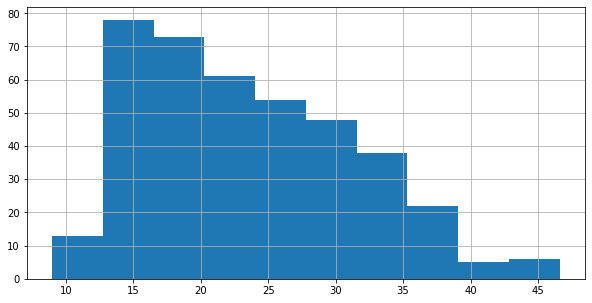

In [25]:
# Plot the histogram of mpg attribute
df['mpg'].hist(figsize=(10,5), bins=10)

b. Identify outliers of mpg using Inter Quartile Range (IQR) approach and impute them with min
and max values appropriately.

In [56]:
# Setting up the IQR
Q1 = np.percentile(df['mpg'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['mpg'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

17.5
29.0
11.5


In [27]:
# Upper bound
upper = np.where(df["mpg"] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df["mpg"] <= (Q1-1.5*IQR))

print('The upper bound is:',upper)
print('The lower bound is:',lower)

The upper bound is: (array([322]),)
The lower bound is: (array([], dtype=int64),)


In [28]:
#Outlier handling, set those value of outliers to upper bound/ lower bound values
df["mpg"].loc[(df['mpg'] > (Q3+1.5*IQR))] = (Q3+1.5*IQR)
df["mpg"].loc[(df['mpg'] < (Q1-1.5*IQR))] = (Q1-1.5*IQR)

There is no outlier of mpg.

c. Transform mpg column using loge (x+1) formula to make the mpg values follow the normal
distribution.

In [29]:
df_transform = df.copy()
df_transform

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
395,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
396,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
397,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
398,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [30]:
df_transform['mpg']=np.log(df_transform['mpg']+1)
df_transform

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,2.944439,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,2.772589,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,2.944439,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,2.833213,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,2.890372,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
395,3.332205,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
396,3.806662,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
397,3.496508,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
398,3.367296,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


d. Use a QQ-plot to show that loge (x+1) is a better transformation for mpg. Find the kurtosis and
skewness of mpg after the transformation.

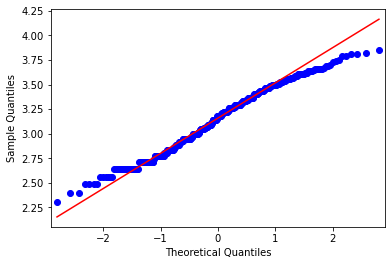

In [31]:
#Plot the qqplot for transformed 'mpg'
sm.qqplot(df_transform['mpg'],line='q')
plt.show()

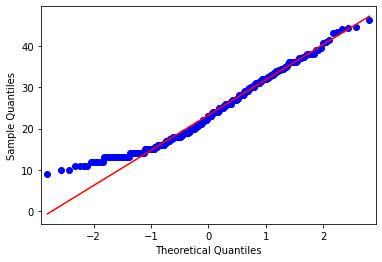

In [32]:
#Plot the qqplot for original 'mpg'
sm.qqplot(df['mpg'],line='q')
plt.show()

In [33]:
print('The skewness value of the mpg attribute after transformation: ', df_transform['mpg'].skew())
print('The kurtosis value of the mpg attribute after transformation: ', df_transform['mpg'].kurt())

The skewness value of the mpg attribute after transformation:  -0.10983988155093921
The kurtosis value of the mpg attribute after transformation:  -0.8204473349416941


e. Similarly detect and correct outliers in the weight, displacement, horsepower and acceleration
columns.

In [34]:
#detect and correct outliers in the weight, displacement, horsepower and acceleration columns.
list_of_columns = ['weight', 'displacement', 'horsepower', 'acceleration']
for columns in list_of_columns:   
    Q1 = np.percentile(df[columns], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df[columns], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1
    
    # Upper bound
    upper = (Q3+1.5*IQR)
    # Lower bound
    lower = (Q1-1.5*IQR)
    
    print('The upper bound outliers of column', columns, 'is:',np.where(df[columns] >= upper))
    print('The lower bound outliers of column', columns, 'is:',np.where(df[columns] <= lower))
    
    
    #impute them with min and max values appropriately
    df[columns].loc[(df[columns] < lower)] = lower
    df[columns].loc[(df[columns] > upper)] = upper

The upper bound outliers of column weight is: (array([], dtype=int64),)
The lower bound outliers of column weight is: (array([], dtype=int64),)
The upper bound outliers of column displacement is: (array([], dtype=int64),)
The lower bound outliers of column displacement is: (array([], dtype=int64),)
The upper bound outliers of column horsepower is: (array([  6,   7,   8,  13,  25,  26,  27,  67,  94,  95, 116]),)
The lower bound outliers of column horsepower is: (array([], dtype=int64),)
The upper bound outliers of column acceleration is: (array([ 59, 195, 196, 299, 300, 326, 394]),)
The lower bound outliers of column acceleration is: (array([ 7,  9, 11]),)


In [35]:
#Check the outlier-cleasened dataset
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
395,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
396,44.0,4.0,97.0,52.0,2130.0,22.1,82.0,2.0
397,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
398,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


f. Display the correlation matrix using the seaborn heatmap function between continuous variables; mpg, horsepower, weight, displacement, and acceleration.

In [36]:
categorical_features = df.select_dtypes(['category']).columns
continuous_features = df.select_dtypes(['float64','int64']).columns
column_list = ['mpg', 'horsepower', 'weight', 'displacement', 'acceleration']

<ipython-input-37-d40ae38fde21>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'mpg'),
  Text(1.5, 0, 'horsepower'),
  Text(2.5, 0, 'weight'),
  Text(3.5, 0, 'displacement'),
  Text(4.5, 0, 'acceleration')])

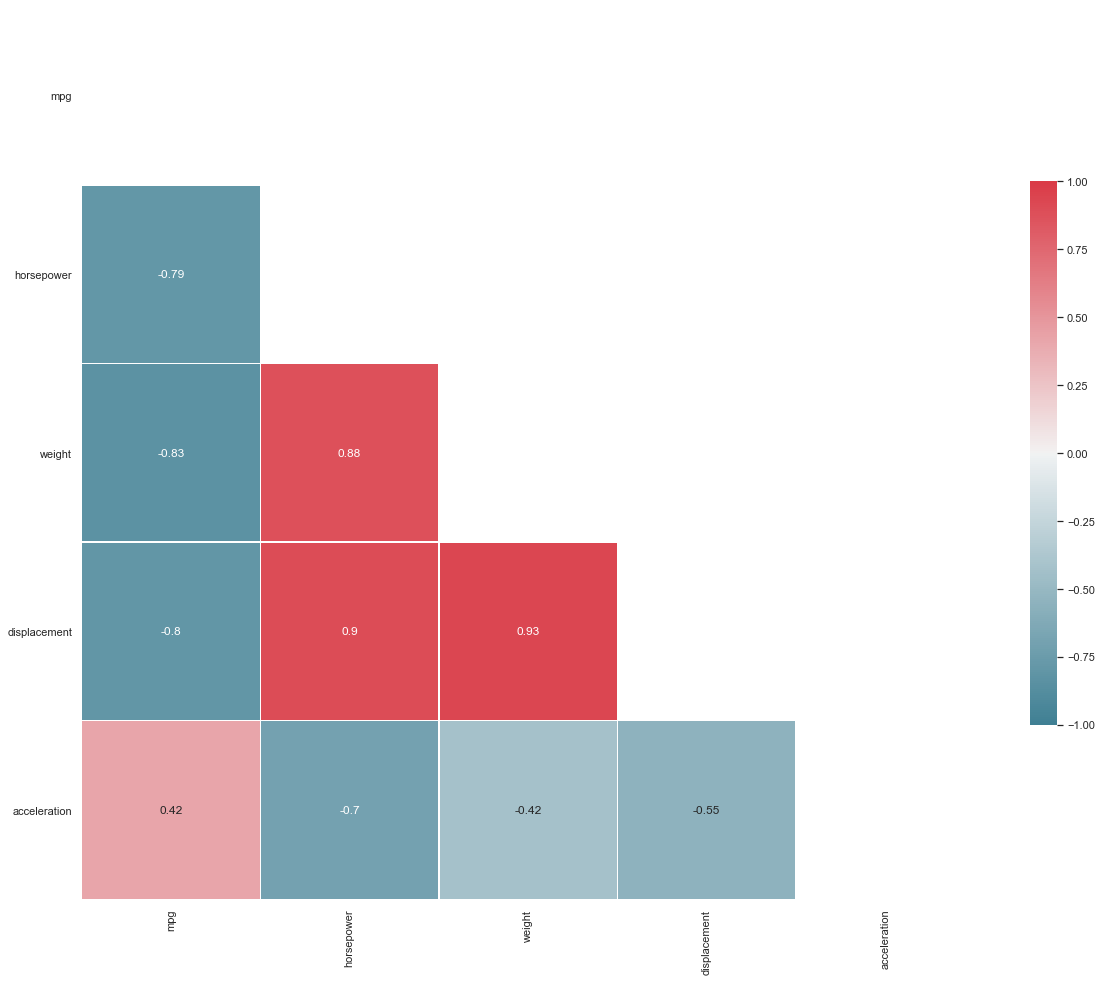

In [37]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = df[column_list].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)

# Part B

#### 1) Write a Python program to answer the following:

a) Transform categorical variables 'cylinders' and 'origin' using one-hot encoding.

In [38]:
# define one hot encoding
enc_cylinders = OneHotEncoder(sparse=False)

# transform 'cylinders' data
cylinders = enc_cylinders.fit_transform(df[['cylinders']])

# create the dataframe
df_cylinders = pd.DataFrame(cylinders,columns = enc_cylinders.get_feature_names())

In [39]:
df_cylinders

,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_8.0
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
393,0.0,1.0,0.0,0.0,0.0
394,0.0,1.0,0.0,0.0,0.0
395,0.0,1.0,0.0,0.0,0.0
396,0.0,1.0,0.0,0.0,0.0


In [40]:
# define one hot encoding
enc_origin = OneHotEncoder(sparse=False)

# transform 'origin' data
origin = enc_origin.fit_transform(df[['origin']])

# create the dataframe
df_origin = pd.DataFrame(origin,columns = enc_origin.get_feature_names())

In [41]:
df_origin

,x0_1.0,x0_2.0,x0_3.0
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
393,1.0,0.0,0.0
394,0.0,1.0,0.0
395,1.0,0.0,0.0
396,1.0,0.0,0.0


b) Calculate correlation matrices for 1) one-hot encoded `cylinders` with mpg, and 2) one-hot encoded `origin` with mpg.

In [42]:
#Join the 'mpg' column with our 'df_cylinders' dataset
df_cylinders = df_cylinders.join(df['mpg'])
df_cylinders

,x0_3.0,x0_4.0,x0_5.0,x0_6.0,x0_8.0,mpg
0,0.0,0.0,0.0,0.0,1.0,18.0
1,0.0,0.0,0.0,0.0,1.0,15.0
2,0.0,0.0,0.0,0.0,1.0,18.0
3,0.0,0.0,0.0,0.0,1.0,16.0
4,0.0,0.0,0.0,0.0,1.0,17.0
...,...,...,...,...,...,...
393,0.0,1.0,0.0,0.0,0.0,36.0
394,0.0,1.0,0.0,0.0,0.0,27.0
395,0.0,1.0,0.0,0.0,0.0,27.0
396,0.0,1.0,0.0,0.0,0.0,44.0


In [43]:
#Set the 'mpg' to target feature y and the others into X.
X = df_cylinders.drop(columns='mpg')
y = df['mpg']

# Save the features of X as a list
column_headers = list(X.columns.values)

# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all the features and target
for column in X[column_headers]:
    # create temp df to merge column and target
    df_temp = pd.concat([X[column], y], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, "mpg"]].corr().values[0,1]
    # add correlation to dict
    corr_dict[column] = correlation
    
# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['mpg']).sort_values('mpg', ascending=False)
corr_df

,mpg
x0_4.0,0.535903
x0_5.0,0.124346
x0_3.0,-0.003666
x0_6.0,-0.134686
x0_8.0,-0.512016


In [44]:
# We use the same way to calculate the correlation metrics of 'origin' with 'mpg'
df_origin = df_origin.join(df['mpg'])

#Set the 'mpg' to target feature y and the others into X.
X = df_origin.drop(columns='mpg')
y = df['mpg']

# Save the features of X as a list
column_headers = list(X.columns.values)

# dict to hold correlation values 
corr_dict = {}

# plot pairwise interaction between all the features and target
for column in X[column_headers]:
    # create temp df to merge column and target
    df_temp = pd.concat([X[column], y], axis=1)
    # store correlation in variable
    correlation = df_temp[[column, "mpg"]].corr().values[0,1]
    # add correlation to dict
    corr_dict[column] = correlation
    
# dataframe holding sorted correlation values to aid in interpreting results
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['mpg']).sort_values('mpg', ascending=False)
corr_df


,mpg
x0_3.0,0.346223
x0_2.0,0.157176
x0_1.0,-0.409366


c. Discuss the correlation coefficient values in part b.

From the correlation tables above, we can see that
1. mpg is positive correlated with cylinders when the value of cylinders is '4' and '5', while the coeeficient values turn to negative if the value of cylinders is '3', '6' or '8'.
2. When the value of origin is '2' or '3', the coefficient values is positive towards mpg. Whereas when the value of origin classified to '1', the coefficient value becomes negative.

d. Use the label encoder technique to find the correlations between `cylinders` and `mpg`, and `origin` and `mpg`.

In [45]:
# define label encoding
label_cylinders = preprocessing.LabelEncoder()

# Transform the data 
df_copy2 = df.copy()
df_copy2['cylinders'] = label_cylinders.fit_transform(df['cylinders'])
df_copy2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,4,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,4,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,4,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,4,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,4,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
395,27.0,1,140.0,86.0,2790.0,15.6,82.0,1.0
396,44.0,1,97.0,52.0,2130.0,22.1,82.0,2.0
397,32.0,1,135.0,84.0,2295.0,11.6,82.0,1.0
398,28.0,1,120.0,79.0,2625.0,18.6,82.0,1.0


In [46]:
# define label encoding
label_origin = preprocessing.LabelEncoder()

# Transform the data 
df_copy2['origin'] = label_cylinders.fit_transform(df['origin'])
df_copy2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,4,307.0,130.0,3504.0,12.0,70.0,0
1,15.0,4,350.0,165.0,3693.0,11.5,70.0,0
2,18.0,4,318.0,150.0,3436.0,11.0,70.0,0
3,16.0,4,304.0,150.0,3433.0,12.0,70.0,0
4,17.0,4,302.0,140.0,3449.0,10.5,70.0,0
...,...,...,...,...,...,...,...,...
395,27.0,1,140.0,86.0,2790.0,15.6,82.0,0
396,44.0,1,97.0,52.0,2130.0,22.1,82.0,1
397,32.0,1,135.0,84.0,2295.0,11.6,82.0,0
398,28.0,1,120.0,79.0,2625.0,18.6,82.0,0


In [47]:
df_copy2['origin'].value_counts()

0    249
2     79
1     70
Name: origin, dtype: int64

In [48]:
#Calculate the correlation of 'cylinders' and 'origin' towards 'mpg'.
cor_cylinder = df[["cylinders", "mpg"]].corr().values[0,1]
cor_origin = df[["origin", "mpg"]].corr().values[0,1]
print("The correlation value between cylinders and mpg under label encoder technique: ", cor_cylinder)
print("The correlation value between origin and mpg under label encoder technique: ", cor_origin)

The correlation value between cylinders and mpg under label encoder technique:  -0.7755562874273204
The correlation value between origin and mpg under label encoder technique:  0.5634359799281162


e. Which encoder is better (label encoder or one-hot encoder)?

Based on the work shown above, we can conclude that label encoder is better than one-hot encoder for the situation because of the following reasons:
1. Label encoder is more suitable to convert the ordinal categorical feature, while one-hot encoder is for the non-ordinal categorical feature.
2. In our case above, label encoder will not cause additional new features.

#### 2) Write a Python program to answer the following:

a. Categorize cars into three classes based on fuel efficiency (mpg): low, medium, and high. Use equal frequency (i.e. number of cars) categorization.

In [49]:
#create a new column name 'fuel efficiency'
df['fuel efficiency'] = pd.qcut(df['mpg'], 3, labels=["bad", "medium", "good"])
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,fuel efficiency
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,bad
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,bad
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,bad
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,bad
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,bad
...,...,...,...,...,...,...,...,...,...
395,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,good
396,44.0,4.0,97.0,52.0,2130.0,22.1,82.0,2.0,good
397,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,good
398,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,good


b. Use PCA to reduce the dimensionality of correlated features; weight, acceleration, displacement, and horsepower. (Hint: use Python library PCA from sklearn.decomposition)

In [50]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,fuel efficiency
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,bad
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,bad
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,bad
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,bad
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,bad
...,...,...,...,...,...,...,...,...,...
395,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,good
396,44.0,4.0,97.0,52.0,2130.0,22.1,82.0,2.0,good
397,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,good
398,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,good


In [51]:
# define transform
pca = PCA(n_components=2) # estimate only 2 PCs
# prepare the on dataset
df_pca = df[['weight','acceleration','displacement','horsepower']]

# project the original data into the PCA space
df_pca_new = pd.DataFrame(pca.fit_transform(df_pca),columns=['component1','component2'])

df_pca_new

,component1,component2
0,543.674876,51.544361
1,737.545389,79.159594
2,478.189563,75.523874
3,473.610433,62.454230
4,488.886713,56.045296
...,...,...
393,-185.888716,-34.066242
394,-847.300422,-4.989300
395,-677.927306,20.277417
396,-352.243274,-35.301420


c. Using a scatter plot, display the differences of three fuel efficiency classes with the first two
principal components (PCs).

In [52]:
#reset the index
df.reset_index(drop=True, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,fuel efficiency
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,bad
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,bad
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,bad
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,bad
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,bad
...,...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,good
394,44.0,4.0,97.0,52.0,2130.0,22.1,82.0,2.0,good
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,good
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,good


In [53]:
df_pca_new = df_pca_new.merge(df[['fuel efficiency']],on=df.index)
df_pca_new=df_pca_new.drop(columns='key_0')
df_pca_new

,component1,component2,fuel efficiency
0,543.674876,51.544361,bad
1,737.545389,79.159594,bad
2,478.189563,75.523874,bad
3,473.610433,62.454230,bad
4,488.886713,56.045296,bad
...,...,...,...
393,-185.888716,-34.066242,good
394,-847.300422,-4.989300,good
395,-677.927306,20.277417,good
396,-352.243274,-35.301420,good


<AxesSubplot:xlabel='component1', ylabel='component2'>

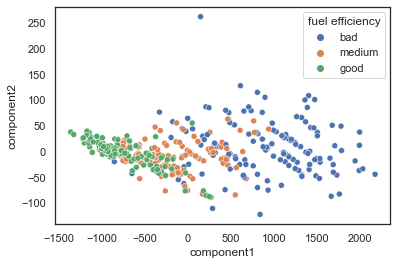

In [54]:
#Plot the scatter plot
sns.scatterplot(x='component1', y='component2', data=df_pca_new, hue='fuel efficiency')